<a href="https://colab.research.google.com/github/igorleonel/DataScience/blob/main/Corretor_Ortogr%C3%A1fico_em_Python_aplicando_t%C3%A9cnicas_de_NLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

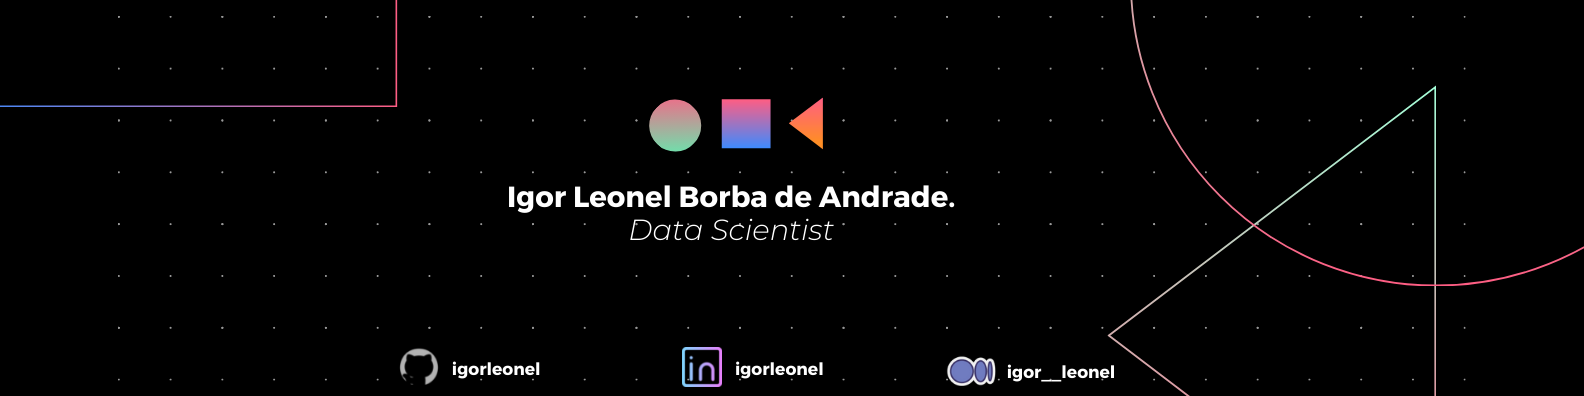

# Corretor Ortográfico em Python: aplicando técnicas de NLP
Neste notebook, construi um corretor ortográfico em português utilizando Python e aplicando técnica de Processamento de Linguagem Natural ou simplesmente *NLP*

## Processamento de Linguagem Natural
Segundo a [SAS](https://www.sas.com/pt_br/insights/analytics/processamento-de-linguagem-natural.html), o processamento de linguagem natural (PLN) é uma vertente da *inteligência artificial* que ajuda computadores a **entender**, **interpretar** e **manipular** a **linguagem humana**. O PLN resulta de diversas disciplinas, incluindo ciência da computação e linguística computacional, que buscam preencher a lacuna entre a **comunicação humana** e o entendimento dos computadores.

Os principais usos do *NLP*: Plataformas de busca **online**, **Previsão** de pesquisas em plataformas de busca, Assistentes virtuais, Chatbots e entre outros.

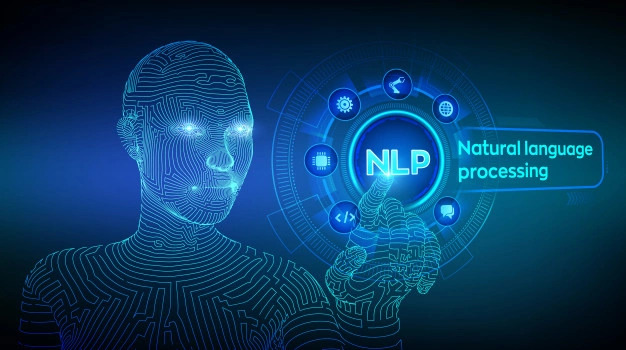

## Porém, como funciona o NLP?
Como que a máquina e o homem conseguem se comunicar? a comunicação não acontece de maneira direta, e sim como intermediário, e esse intermediário é justamente o Processamento de Linguagem Natural

## O corretor ortográfico com Python:
A ideia do corretor aqui, é escolher uma palavra digitada equivocadamente (por exemplo a palavra "lgica") e corrigi-la com o algoritmo de NLP - retornando assim, a palavra correta (lógica). \
Mas antes, vamos importar a biblioteca para ocultar os avisos de outras bibliotecas:

In [1]:
# importando o warnings para ocultar os avisos das bibliotecas
#@title
import warnings
warnings.filterwarnings("ignore")

## Base de treinamento
Para a criação do algoritmo, precisamos de uma base de treinamento; para o treinamento, utilizei um compilado de todos os artigos da Alura. Porém, precisamo também, avaliar se a base é adequado e visualizar as métricas para treinar nosso modelo.

### Importando o corpus textual

In [2]:
# exportando a base de dados
with open('artigos.txt', "r") as f:
    artigos = f.read()

# visualizando o compilado
print(artigos[:500])




imagem 

Temos a seguinte classe que representa um usuário no nosso sistema:

java

Para salvar um novo usuário, várias validações são feitas, como por exemplo: Ver se o nome só contém letras, [**o CPF só números**] e ver se o usuário possui no mínimo 18 anos. Veja o método que faz essa validação:

java 

Suponha agora que eu tenha outra classe, a classe `Produto`, que contém um atributo nome e eu quero fazer a mesma validação que fiz para o nome do usuário: Ver se só contém letras. E aí? Vou


## Validação
Vamos vefiricar se o corpus exportado é ideal e se tem palavras suficentes para a criação do corretor, ou se repete muitas palavras.

### Tokenização

In [3]:
# quantidade de palavras que o corpus tem
len(artigos)

2605046

Aqui temos um mais de 2 milhões de palavras, porém, será mesmo que existem mais de dois milhões de palavras no corpus? Vamos fazer o `len` de uma palavra conhecida e depois realizar o mesmo para todo o corpus.


In [4]:
# utilizando o split
texto_exemplo = 'Olá, tudo bem?'
tokens = texto_exemplo.split()
print(tokens)
print(f'Temos um total de {len(tokens)} palavras nesta lista')

['Olá,', 'tudo', 'bem?']
Temos um total de 3 palavras nesta lista


In [5]:
# separar as palavras e as pontuações utilizando a biblioteca nltk
import nltk
nltk.download('punkt')
palavras_separadas = nltk.tokenize.word_tokenize(texto_exemplo)
print(palavras_separadas)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


['Olá', ',', 'tudo', 'bem', '?']


In [6]:
# extrair apenas as palavras
def separa_palavras(lista_tokens):
    lista_palavras = []
    for token in lista_tokens:
        if token.isalpha():
            lista_palavras.append(token)
    return lista_palavras

separa_palavras(palavras_separadas)

['Olá', 'tudo', 'bem']

In [7]:
# quantidade de palavras que existem no corpus
lista_tokens = nltk.tokenize.word_tokenize(artigos)
lista_palavras = separa_palavras(lista_tokens)
print(f'O número de palavras é {len(lista_palavras)}')

O número de palavras é 403031


## Normalização
O valor total de `393916` palavras retornado anteriormente em nosso corpus não representa a quantidade de palavras únicas que podem ser corrigidas, afinal muitas delas aparecerão *repetidas* nos textos.

Portanto, precisaremos calcular quantos vocábulos únicos existem sem repetição.

In [8]:
# normalizar o corpus e transformar todo o texto em letras minúsculas
def normalizacao(lista_palavras):
    lista_normalizada = []
    for palavra in lista_palavras:
        lista_normalizada.append(palavra.lower())
    return lista_normalizada

lista_normalizada = normalizacao(lista_palavras)
print(lista_normalizada[:5])

['imagem', 'temos', 'a', 'seguinte', 'classe']


In [9]:
# remover as palavras repetidas e contabilizá-las
len(set(lista_normalizada)) # retornar uma lista sem repetição

18464

In [10]:
# inserindo letras
palavra_exemplo = 'lgica'

def gerador_palavras(palavra):
    fatias = []
    for i in range(len(palavra)+1):
        fatias.append((palavra[:i], palavra[i:]))
    palavras_geradas = insere_letras(fatias)
    return palavras_geradas 

def insere_letras(fatias):
    novas_palavras = []    
    letras = 'abcdefghijklmnopqrstuvwxyzàáâãèéêìíîòóôõùúûç'
    for E, D in fatias:
        for letra in letras:
            novas_palavras.append(E + letra + D)
    return novas_palavras

palavras_geradas = gerador_palavras(palavra_exemplo)
print(palavras_geradas)

['algica', 'blgica', 'clgica', 'dlgica', 'elgica', 'flgica', 'glgica', 'hlgica', 'ilgica', 'jlgica', 'klgica', 'llgica', 'mlgica', 'nlgica', 'olgica', 'plgica', 'qlgica', 'rlgica', 'slgica', 'tlgica', 'ulgica', 'vlgica', 'wlgica', 'xlgica', 'ylgica', 'zlgica', 'àlgica', 'álgica', 'âlgica', 'ãlgica', 'èlgica', 'élgica', 'êlgica', 'ìlgica', 'ílgica', 'îlgica', 'òlgica', 'ólgica', 'ôlgica', 'õlgica', 'ùlgica', 'úlgica', 'ûlgica', 'çlgica', 'lagica', 'lbgica', 'lcgica', 'ldgica', 'legica', 'lfgica', 'lggica', 'lhgica', 'ligica', 'ljgica', 'lkgica', 'llgica', 'lmgica', 'lngica', 'logica', 'lpgica', 'lqgica', 'lrgica', 'lsgica', 'ltgica', 'lugica', 'lvgica', 'lwgica', 'lxgica', 'lygica', 'lzgica', 'làgica', 'lágica', 'lâgica', 'lãgica', 'lègica', 'légica', 'lêgica', 'lìgica', 'lígica', 'lîgica', 'lògica', 'lógica', 'lôgica', 'lõgica', 'lùgica', 'lúgica', 'lûgica', 'lçgica', 'lgaica', 'lgbica', 'lgcica', 'lgdica', 'lgeica', 'lgfica', 'lggica', 'lghica', 'lgiica', 'lgjica', 'lgkica', 'lglica',

## Construindo a função corretor
Com a função de gerar palavras e inserir letras, ainda falta afirmar que "lógica" é a palavra correta a ser retornada.

In [11]:
# função corretor
def corretor(palavra):
    palavras_geradas = gerador_palavras(palavra)
    palavra_correta = max(palavras_geradas, key=probabilidade)
    return palavra_correta

Pra construirmos a função probabilidade() em uma nova célula, primeiro precisaremos fazer este cálculo com uma palavra; a frequência do termo “lógica” será a quantidade de vezes que este parece no corpus em relação ao total de palavras. Para calcular, o nltk possui a função .FreqDist().

In [12]:
# a frequencia da palavra "lógica", é a quantidade de vezes que a palavra aparece no nosso corpus sobre o total de palavras
frequencia = nltk.FreqDist(lista_normalizada) # calcula a distribuição de frequência das palavras
frequencia.most_common(10)

[('de', 15502),
 ('o', 14056),
 ('que', 12230),
 ('a', 11099),
 ('e', 10501),
 ('para', 7710),
 ('um', 6367),
 ('é', 5899),
 ('uma', 5220),
 ('do', 5124)]

In [13]:
total_palavras = len(lista_normalizada)

In [14]:
def probabilidade(palavra_gerada):
    return frequencia[palavra_gerada]/total_palavras

print(f'Probabilidade da palavra "logica": {probabilidade("logica")}')
print(f'Probabilidade da palavra "lógica": {probabilidade("lógica")}')

Probabilidade da palavra "logica": 0.0
Probabilidade da palavra "lógica": 0.00023819507680550628


In [15]:
# testando com o nosso exemplo 'lgica'
corretor(palavra_exemplo)

'lógica'

Porém, só estamos corrigindo o tipo de erro onde uma letra não foi digitada, o termo “lgica”, e é interessante tratarmos outros casos.

Por enquanto o corretor já é capaz de corrigir um único tipo de erro, mas precisaremos ampliar os operações de correção para abranger mais casos equivocados.

Se por acaso digitarmos um caractere a mais, como "lógicaa" ou "lógicca" por exemplo, também deveremos ter outras operações que realizam a correção, além da inserção que já vimos.


In [16]:
def cria_dados_teste(nome_arquivo):
    lista_palavras_teste = []
    f = open(nome_arquivo, "r")
    for linha in f:
        correta, errada = linha.split()
        lista_palavras_teste.append(((correta, errada)))
    f.close()
    return lista_palavras_teste

lista_teste = cria_dados_teste('palavras.txt')
lista_teste

[('podemos', 'pyodemos'),
 ('esse', 'esje'),
 ('já', 'jrá'),
 ('nosso', 'nossov'),
 ('são', 'sãêo'),
 ('dos', 'dosa'),
 ('muito', 'muifo'),
 ('imagem', 'iômagem'),
 ('sua', 'ósua'),
 ('também', 'tambéùm'),
 ('ele', 'eme'),
 ('fazer', 'èazer'),
 ('temos', 'temfs'),
 ('essa', 'eàssa'),
 ('quando', 'quaôdo'),
 ('vamos', 'vamvos'),
 ('sobre', 'hsobre'),
 ('java', 'sjava'),
 ('das', 'daõs'),
 ('agora', 'agorah'),
 ('está', 'eòtá'),
 ('cada', 'céda'),
 ('mesmo', 'zmesmo'),
 ('nos', 'noâ'),
 ('forma', 'fobma'),
 ('seja', 'sejéa'),
 ('então', 'enêão'),
 ('criar', 'èriar'),
 ('código', 'cóeigo'),
 ('caso', 'casío'),
 ('exemplo', 'áexemplo'),
 ('tem', 'tĩem'),
 ('usuário', 'usuárôio'),
 ('dados', 'dfados'),
 ('python', 'pgthon'),
 ('nossa', 'nossah'),
 ('além', 'alémè'),
 ('assim', 'asõim'),
 ('ter', 'teb'),
 ('até', 'atĩ'),
 ('bem', 'âem'),
 ('design', 'desigen'),
 ('trabalho', 'trabalàho'),
 ('foi', 'foo'),
 ('apenas', 'apenaũ'),
 ('empresa', 'empresà'),
 ('valor', 'valíor'),
 ('será', 'serr')

## Avaliando o corretor

In [17]:
def avaliador(testes):
    numero_palavras = len(testes)
    acertou = 0
    for correta, errada in testes:
        palavra_corrigida = corretor(errada)
        if palavra_corrigida == correta:
            acertou += 1
    taxa_acerto = round(acertou*100/numero_palavras, 2)
    print(f"{taxa_acerto}% de {numero_palavras} palavras")

avaliador(lista_teste)

1.08% de 186 palavras


Ao rodarmos a célula, teremos o resultado de apenas 1.08% de taxa de acerto num total de 186 palavras.

Este é um número inadmissível, pois é muito baixo para um corretor ortográfico.

Como já conseguimos comparar os nossos corretores, sabemos o quanto estamos acertando para podermos melhorá-lo.

## Operação de delete




A operação que realizamos para corrigir o primeiro problema da falta de um caractere em "lgica" insere uma letra em todas as posições possíveis da palavra, gerando vários resultados.

Neste passo, corrigiremos um outro tipo de erro bastante comum também além de deletar ou esquecer de digitar, que consiste em escrever uma letra a mais por engano.

Por exemplo, nosso algoritmo receberá o termo equivocado “lóigica”, e notaremos que a tecla “O” fica ao lado de “I” no teclado padrão, o que facilmente poderia levar a este erro. Logo, precisaremos que nos retorne a palavra correta “lógica”.

In [18]:
def deletando_caracteres(fatias):
    novas_palavras = []    
    for E, D in fatias:
        novas_palavras.append(E + D[1:])
    return novas_palavras

In [19]:
def gerador_palavras(palavra):
    fatias = []
    for i in range(len(palavra)+1):
        fatias.append((palavra[:i], palavra[i:]))
    palavras_geradas = insere_letras(fatias)
    palavras_geradas += deletando_caracteres(fatias)
    return palavras_geradas 

palavra_exemplo = 'lóigica'
palavras_geradas = gerador_palavras(palavra_exemplo)
print(palavras_geradas)

['alóigica', 'blóigica', 'clóigica', 'dlóigica', 'elóigica', 'flóigica', 'glóigica', 'hlóigica', 'ilóigica', 'jlóigica', 'klóigica', 'llóigica', 'mlóigica', 'nlóigica', 'olóigica', 'plóigica', 'qlóigica', 'rlóigica', 'slóigica', 'tlóigica', 'ulóigica', 'vlóigica', 'wlóigica', 'xlóigica', 'ylóigica', 'zlóigica', 'àlóigica', 'álóigica', 'âlóigica', 'ãlóigica', 'èlóigica', 'élóigica', 'êlóigica', 'ìlóigica', 'ílóigica', 'îlóigica', 'òlóigica', 'ólóigica', 'ôlóigica', 'õlóigica', 'ùlóigica', 'úlóigica', 'ûlóigica', 'çlóigica', 'laóigica', 'lbóigica', 'lcóigica', 'ldóigica', 'leóigica', 'lfóigica', 'lgóigica', 'lhóigica', 'lióigica', 'ljóigica', 'lkóigica', 'llóigica', 'lmóigica', 'lnóigica', 'loóigica', 'lpóigica', 'lqóigica', 'lróigica', 'lsóigica', 'ltóigica', 'luóigica', 'lvóigica', 'lwóigica', 'lxóigica', 'lyóigica', 'lzóigica', 'làóigica', 'láóigica', 'lâóigica', 'lãóigica', 'lèóigica', 'léóigica', 'lêóigica', 'lìóigica', 'líóigica', 'lîóigica', 'lòóigica', 'lóóigica', 'lôóigica', 'lõ

In [20]:
avaliador(lista_teste)

41.4% de 186 palavras


No retorno deste comando, teremos uma taxa de acerto de 41.4% de 186 palavras. Ou seja, fizemos um ótimo upgrade em comparação com com o resultado anterior.

## Trocando letras
Resumidamente, as operações consistem em dividir a string equivocada em duas partes e adicionar ou eliminar um caractere para obter diferentes resultados até chegar na palavra correta, através das funções insere_letras() e deletando_caracteres() respectivamente.

Porém, ainda existem outros tipos de erros, como quando trocamos uma letra por outra. Por exemplo, na hora de digitar o “ó” no teclado, sem querer apertamos a tecla “í” que está bem ao lado do caractere correto, gerando a palavra errada "lígica".

Para isso, elaborei uma tabela para entender melhor como fazê-la.

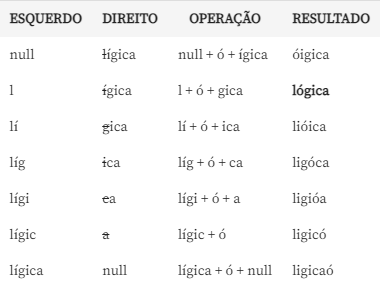

Para resolvermos o problema de digitação anterior, criaremos a função troca_letra(), que substituirá uma letra equivocada pela correta.

Neste passo, corrigiremos um erro de digitação onde letras foram invertidas em suas posições, como na palavra escrita errada "lgóica".

Portanto, a posição da letra “g” foi trocada com a letra “ó”, e como se trata de um equívoco bastante comum, precisaremos deixar o corretor cada vez mais abrangente.

## Invertendo letras
Dividiremos a string "lgóica" em duas partes como já nos habituamos. Para começarmos, pegaremos o primeiro lado null da primeira linha e realizaremos a concatenação com a segunda letra "g".

Depois, pegaremos a primeira letra do segundo lado "l" e realizaremos a concatenação com o restante da palavra "óica" neste primeiro resultado.

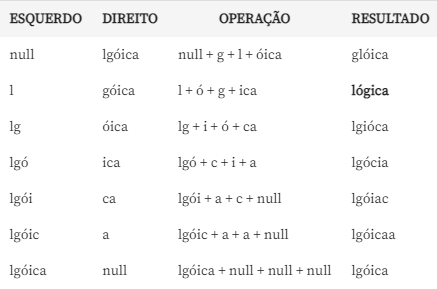

In [21]:
def insere_letras(fatias):
    novas_palavras = []
    letras = 'abcdefghijklmnopqrstuvwxyzáâàãéêèẽíîìĩóôõòúûùũç'
    for E, D in fatias:
        for letra in letras:
            novas_palavras.append(E + letra + D)
    return novas_palavras

def deletando_caracteres(fatias):
    novas_palavras = []
    for E, D in fatias:
        novas_palavras.append(E + D[1:])
    return novas_palavras

def troca_letra(fatias):
    novas_palavras = []
    letras = 'abcdefghijklmnopqrstuvwxyzáâàãéêèẽíîìĩóôõòúûùũç'
    for E, D in fatias:
        for letra in letras:
            novas_palavras.append(E + letra + D[1:])
    return novas_palavras

def inverte_letra(fatias):
    novas_palavras = []
    for E, D in fatias:
        if len(D) > 1:
            novas_palavras.append(E + D[1] + D[0] + D[2:])
    return novas_palavras

def gerador_palavras(palavra):
    fatias = []
    for i in range(len(palavra)+1):
        fatias.append((palavra[:i],palavra[i:]))
    palavras_geradas = insere_letras(fatias)
    palavras_geradas += deletando_caracteres(fatias)
    palavras_geradas += troca_letra(fatias)
    palavras_geradas += inverte_letra(fatias)
    return palavras_geradas

palavra_exemplo = "lógiac"
palavras_geradas = gerador_palavras(palavra_exemplo)
print(palavras_geradas)

['alógiac', 'blógiac', 'clógiac', 'dlógiac', 'elógiac', 'flógiac', 'glógiac', 'hlógiac', 'ilógiac', 'jlógiac', 'klógiac', 'llógiac', 'mlógiac', 'nlógiac', 'ológiac', 'plógiac', 'qlógiac', 'rlógiac', 'slógiac', 'tlógiac', 'ulógiac', 'vlógiac', 'wlógiac', 'xlógiac', 'ylógiac', 'zlógiac', 'álógiac', 'âlógiac', 'àlógiac', 'ãlógiac', 'élógiac', 'êlógiac', 'èlógiac', 'ẽlógiac', 'ílógiac', 'îlógiac', 'ìlógiac', 'ĩlógiac', 'ólógiac', 'ôlógiac', 'õlógiac', 'òlógiac', 'úlógiac', 'ûlógiac', 'ùlógiac', 'ũlógiac', 'çlógiac', 'laógiac', 'lbógiac', 'lcógiac', 'ldógiac', 'leógiac', 'lfógiac', 'lgógiac', 'lhógiac', 'liógiac', 'ljógiac', 'lkógiac', 'llógiac', 'lmógiac', 'lnógiac', 'loógiac', 'lpógiac', 'lqógiac', 'lrógiac', 'lsógiac', 'ltógiac', 'luógiac', 'lvógiac', 'lwógiac', 'lxógiac', 'lyógiac', 'lzógiac', 'láógiac', 'lâógiac', 'làógiac', 'lãógiac', 'léógiac', 'lêógiac', 'lèógiac', 'lẽógiac', 'líógiac', 'lîógiac', 'lìógiac', 'lĩógiac', 'lóógiac', 'lôógiac', 'lõógiac', 'lòógiac', 'lúógiac', 'lûógiac'

In [22]:
avaliador(lista_teste)

76.34% de 186 palavras


O resultado será de 76.34% de 186 palavras. Portanto, melhoramos consideravelmente o nosso corretor, pois começamos com aproximadamente 1% de taxa de acerto apenas, o que era inaceitável.

Porém, estamos realizando os testes a partir de uma lista de palavras que pode conter alguns termos ainda desconhecidos pelo nosso vocabulário.

Então os quase 24% restantes de erro estão associados tanto ao erro do próprio corretor quanto ao fato de desconhecermos a palavra, pois se o algoritmo ainda não a conhece, a correção não será feita.

## Palavras desconhecidas ao vocabulário
Às vezes um determinado termo ainda é desconhecido, e portanto não podemos realizar a correção de algo que não conhecemos.

Em um exemplo dado anteriormente, se conhecemos cerca de apenas 100 palavras de um idioma estrangeiro, somente poderemos corrigir esta mesma quantidade de palavras conhecidas.

Logo, o modelo do corretor é restrito por este volume de vocabulário, calculado em 17.654 vocábulos em nosso caso.

Precisaremos calcular o quanto que essa restrição está impactando no resultado, pois temos uma taxa de erro e deveremos saber o quanto desta porcentagem está associada às palavras desconhecidas.

Para isso, usaremos a função avaliador(). Copiaremos seu bloco de código e colaremos em uma nova célula seguinte no Google Colab.

In [23]:
def avaliador(testes, vocalubario):
    numero_palavras = len(testes)
    acertou = 0
    desconhecida = 0
    for correta, errada in testes:
        palavra_corrigida = corretor(errada)
        if palavra_corrigida == correta:
            acertou += 1
        else:
            desconhecida += (correta not in vocalubario)
    taxa_acerto = round(acertou*100/numero_palavras, 2)
    taxa_desconhecida = round(desconhecida*100/numero_palavras, 2)
    print(f"{taxa_acerto}% de {numero_palavras} palavras, desconhecida {taxa_desconhecida}%")

vocabulario = set(lista_normalizada)
avaliador(lista_teste, vocabulario)

76.34% de 186 palavras, desconhecida 6.99%


Como retorno da execução, teremos a taxa de acerto de `76,34%` e a taxa de palavras desconhecidas de `6.99%.`

Agora, descobriremos se há um maneira de tornarmos nosso algoritmo mais abrangente com alguma expansão de metodologia.

## Turbinando o gerador de palavra
Às vezes poderemos ter um problema em que sejam necessárias mais operações para corrigirmos a palavra digitada equivocadamente. 

Por exemplo, se escrevermos erroneamente “lóiigica”, precisaremos deletar o caractere “i” duas vezes, e o nosso corretor ainda não é capaz de fazer isso.

Logo, notaremos que o nosso corretor só corrige palavras que estão a **uma única distância** da correta. Então construiremos uma função que corrigirá as que estão a **duas distâncias** do resultado correto, e verificará qual será o retorno do novo corretor.

In [26]:
palavra = "lóiigica"

def gerador_turbinado(palavras_geradas):
    novas_palavras = []
    for palavra in palavras_geradas:
        novas_palavras += gerador_palavras(palavra)
    return novas_palavras

palavras_g = gerador_turbinado(gerador_palavras(palavra))
"lógica" in palavras_g

True

In [27]:
len(palavras_g)

787396

Como retorno, veremos que gerou 787396 variações de uma única palavra, ou seja teremos um volume extra de palavras geradas.

Sempre fazer a correção com esta grande quantidade de resultados talvez não faça sentido, pois demoraria muito.

In [32]:
def novo_corretor(palavra):
    palavras_geradas = gerador_palavras(palavra)
    palavras_turbinado = gerador_turbinado(palavras_geradas)
    todas_palavras = set(palavras_geradas + palavras_turbinado)
    candidatos = [palavra]
    for palavra in todas_palavras:
        if palavra in vocabulario:
            candidatos.append(palavra)
    palavra_correta = max(candidatos, key=probabilidade)
    return palavra_correta

novo_corretor(palavra)

'lógica'

Com isso, corrigimos a nossa palavra ao receber 'lógica', e calculamos a probabilidade máxima de candidatos, sendo apenas 2. O grande restante de resultados é insignificante para este novo corretor, pois não nos servirá para o que queremos.

## Avaliando o resultado dos dois corretores

Agora, testaremos o novo_corretor() e o compararemos com o corretor antigo para verificarmos as qualidades e escolhermos o melhor.

In [35]:
def avaliador(testes, vocalubario):
    numero_palavras = len(testes)
    acertou = 0
    desconhecida = 0
    for correta, errada in testes:
        palavra_corrigida = novo_corretor(errada)
        desconhecida += (correta not in vocalubario)
        if palavra_corrigida == correta:
            acertou += 1
        else:
            print(errada + '-' + corretor(errada) + '-' + palavra_corrigida)
    taxa_acerto = round(acertou*100/numero_palavras, 2)
    taxa_desconhecida = round(desconhecida*100/numero_palavras, 2)
    print(f"{taxa_acerto}% de {numero_palavras} palavras, desconhecida {taxa_desconhecida}%")

vocabulario = set(lista_normalizada)
avaliador(lista_teste, vocabulario)

esje-esse-se
sãêo-são-não
dosa-dos-do
eme-em-de
eàssa-essa-esse
daõs-das-da
céda-cada-da
noâ-no-o
enêão-então-não
tĩem-tem-em
nossah-nossa-nosso
teb-tem-de
atĩ-até-a
âem-em-de
foo-foi-o
serr-ser-se
entke-entre-então
van-vai-a
çeus-seus-seu
eû-e-de
temeo-tempo-temos
semre-sempre-ser
elaá-ela-ele
síó-só-se
siàe-site-se
seém-sem-em
peln-pelo-ele
aléra-alura-agora
tdia-dia-da
tuúo-tudo-tipo
jé-é-de
sãô-são-não
odos-dos-do
siua-sua-seu
elpe-ele-esse
teos-temos-os
eũsa-essa-esse
vjmos-vamos-temos
dms-dos-de
cava-java-para
ános-nos-no
èaso-caso-as
túem-tem-em
daáos-dados-dos
nossk-nosso-nosso
tãer-ter-ser
vté-até-é
búm-bem-um
sçerá-será-ser
entró-entre-então
uai-vai-a
sâus-seus-seu
ìeu-seu-de
fual-qual-sua
elal-ela-ele
skó-só-se
secm-sem-em
aluéa-alura-além
dil-dia-de
sód-só-se
eúaa-aeúaa-essa
ró-só-de
dĩaz-adĩaz-da
correptor-corretor-correto
trtica-tática-prática
ewpoderamento-aewpoderamento-ewpoderamento
îgato-gato-fato
cakvalo-acakvalo-carvalho
canelac-acanelac-janela
tênisy-atênisy-tênisy

Na primeira linha, teremos a palavra digitada equivocadamente esje, onde provavelmente a pessoa substituiu o “j” pelo “s”. Assim, gerou as palavras certas esse e se.

Na terceira linha do resultado, teremos a palavra dosa onde digitaram um “a” a mais, pois está ao lado da tecla "s".

Nosso corretor antigo fez a corrigiu para dos corretamente. Porém, o novo corretor corrige para do, o que está incorreto, pois novo_corretor gera ambos os resultados.

Porém, do aparece muito mais vezes do que a palavra dos. Como dependemos dessa máxima probabilidade, a função exibirá o termo que possui uma maior chance de estar correta, mesmo que a outra palavra também seja uma possibilidade correta.

In [37]:
def avaliador(testes, vocalubario):
    numero_palavras = len(testes)
    acertou = 0
    desconhecida = 0
    for correta, errada in testes:
        palavra_corrigida = corretor(errada)
        desconhecida += (correta not in vocalubario)
        if palavra_corrigida == correta:
            acertou += 1
    taxa_acerto = round(acertou*100/numero_palavras, 2)
    taxa_desconhecida = round(desconhecida*100/numero_palavras, 2)
    print(f"{taxa_acerto}% de {numero_palavras} palavras, desconhecida {taxa_desconhecida}%")

vocabulario = set(lista_normalizada)
avaliador(lista_teste, vocabulario)

76.34% de 186 palavras, desconhecida 6.99%


Rodando este código para verificarmos o resultado final do avaliador(), veremos nosso corretor tem 76.34% e desconhece aproximadamente 7% das palavras. Portanto, possui uma performance bem interessante.

Para finalizarmos, teremos uma nova célula para analisarmos seu funcionamento com outros exemplos de termos errados.

Imprimiremos o novo_corretor() e o antigo corretor para os nossos dados. Como exemplo, teremos a palavra sendo igual a “lgica”.

Já no caso da palavra "lóigica", os dois retornam a palavra correta.

Se eu colocar mais um “i” equivocadamente obtendo "lóiigica", veremos que nosso corretor definitivo não conseguirá corrigir esse tipo de erro.

Como retorno, veremos um alóiigica e a palavra correta lógica.

In [40]:
palavra = 'lgica'
print(novo_corretor(palavra))
print(corretor(palavra))

fica
lógica


In [41]:
palavra = 'lóigica'
print(novo_corretor(palavra))
print(corretor(palavra))

lógica
lógica


In [42]:
palavra = 'lóiigica'
print(novo_corretor(palavra))
print(corretor(palavra))

lógica
alóiigica
